# plot scattering of c vs. Z

In [19]:
import copy
import numpy as np
import matplotlib.pyplot as plt
from counterflow_file import *

In [2]:
# parameters
models = np.array([['IEM','EMST'],
                   ['IEMHYB','EMSTHYB']])
modeln = np.array([['IEM','EMST'],
                   ['IEM-FI','EMST-FI']])

params = {}
params['MIX'] = None
params['tres'] = 1.e-2
params['tmix'] = 0.2
params['eqv'] = 1.0
params['Zfvar'] = 0.1
params['dtmix'] = 0.01
params['phif'] = 4.76

dst = '.'
csv_name = 'ZCTR.csv'
npts = 1000

In [34]:
# plot
# figure and axes parameters
# total width is fixed, for one column plot
plot_width    = 14.4
margin_left   = 1.5
margin_right  = 0.2
margin_bottom = 0.8
margin_top    = 0.2
space_width   = 1.5
space_height  = 1.5
ftsize        = 7

font = {'family':'serif',
        'weight':'normal',
        'size':ftsize}

# use TEX for interpreter
plt.rc('text',usetex=True)
# use serif font
plt.rc('font',**font)

num_rows, num_cols = models.shape

subplot_width = (plot_width
                -margin_left
                -margin_right
                -(num_cols-1)*space_width)/num_cols
subplot_height = subplot_width * 0.5

plot_height = (num_rows*subplot_height
              +margin_bottom
              +margin_top
              +(num_rows-1)*space_height)

In [4]:
# load data
scatter = {}

for i in range(num_rows):
    for j in range(num_cols):
        params['MIX'] = models[i, j]
        case = params2name(params)
        file_name = '/'.join([case,csv_name])
        
        data = np.genfromtxt(file_name,
                             delimiter=',',
                             names=True)
        
        scatter[params['MIX']] = np.column_stack((data['Z'][-npts:], data['C'][-npts:]))

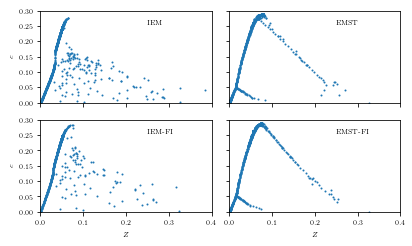

In [37]:
fig, ax = plt.subplots(
    num_rows,num_cols,
    sharex=True,sharey=True,
    figsize=cm2inch(plot_width,plot_height))

for i in range(num_rows):
    for j in range(num_cols):
        ax[i,j].scatter(
            scatter[models[i,j]][:,0],scatter[models[i,j]][:,1],
            s=4,marker='.')
        ax[i,j].text(0.25,0.25,modeln[i,j])
        
ax[0, 0].set_xlim([0, 0.4])
ax[0, 0].set_ylim([0, 0.3])
ax[0, 0].set_xticks(np.arange(0,0.5,0.1))

fig.subplots_adjust(left = margin_left/plot_width,
                    bottom = margin_bottom/plot_height,
                    right = 1.0-margin_right/plot_width,
                    top = 1.0-margin_top/plot_height,
                    wspace = space_width/plot_width,
                    hspace = space_height/plot_height
                   )

for j in range(num_cols):
    ax[-1,j].set_xlabel('$Z$')
    #ax[0,j].tick_params('x',length=0)
for j in range(num_rows):
    ax[j,0].set_ylabel('$c$')
    #ax[j,-1].tick_params('y',length=0)

In [38]:
plot_params = copy.deepcopy(params)
del plot_params['MIX']
del plot_params['tres']
del plot_params['dtmix']
del plot_params['phif']
del plot_params['Zfvar']
plot_name = params2name(plot_params)

fig.savefig('{}/fig_zc_scatter_{}.pdf'.format(dst,plot_name))